In [79]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

# NOTE: these lines define global figure properties used for publication.
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') # display figures in vector format
plt.rcParams.update({'font.size':14}) # set global font size

In [80]:
# import the data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
data = pd.read_csv(url,sep=',',encoding='unicode_escape')

In [81]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### [연습문제 11-1]

In [82]:
# binarize the seasons
data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)
data

/var/folders/_4/mvxsg_zj2q35755ky_zps0780000gn/T/ipykernel_5610/3456959338.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(['Spring','Summer', 'Autumn','Winter'],[1,1,0,0], inplace=True)


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,No Holiday,Yes


In [83]:
desmat = data[['Rainfall(mm)','Seasons']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)
y = data[['Rented Bike Count']].to_numpy()

In [84]:
import statsmodels.api as sm

# extract data (staying with pandas dataframes)
desmat_df  = data[['Rainfall(mm)','Seasons']]
obsdata_df = data['Rented Bike Count']

# create and fit the model
desmat_df = sm.add_constant(desmat_df) # must explicitly add an intercept (constant)
model = sm.OLS(obsdata_df,desmat_df).fit()
print( model.summary() )

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     468.8
Date:                Mon, 11 Nov 2024   Prob (F-statistic):          3.80e-194
Time:                        17:47:20   Log-Likelihood:                -68654.
No. Observations:                8760   AIC:                         1.373e+05
Df Residuals:                    8757   BIC:                         1.373e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          530.4946      9.313     56.963   

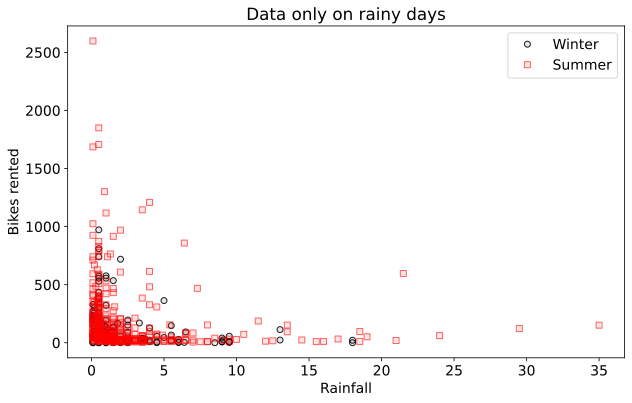

In [85]:
# 강우량이 0이 아닌 데이터 행에 대해서 반복
desmat_norain = desmat[desmat[:,0]>0,:]
y_norain = y[desmat[:,0]>0,:]

plt.figure(figsize=(10,6))

# separately for autumn/winter and spring/summer
plt.plot(desmat_norain[desmat_norain[:,1]==0,0],y_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(desmat_norain[desmat_norain[:,1]==1,0],y_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.xlabel('Rainfall')
plt.ylabel('Bikes rented')
plt.title('Data only on rainy days')
plt.legend()
plt.show()

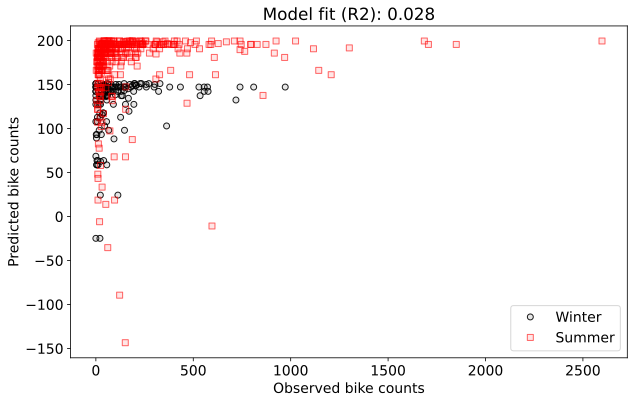

In [86]:
# run the regression (using np's least-squares)
beta_norain = np.linalg.lstsq(desmat_norain,y_norain,rcond=None)


# predicted data
yHat_norain = desmat_norain @ beta_norain[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y_norain.T,yHat_norain.T)[0,1]**2



## plot some results.
plt.figure(figsize=(10,6))
plt.plot(y_norain[desmat_norain[:,1]==0],yHat_norain[desmat_norain[:,1]==0],'o',
         markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9),label='Winter')
plt.plot(y_norain[desmat_norain[:,1]==1],yHat_norain[desmat_norain[:,1]==1],'s',
         markerfacecolor=(1,0,0,.1),markeredgecolor=(1,0,0,.6),label='Summer')

plt.legend()
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit (R2): {modelfit:.3f}')
plt.show()

- 개선이 안된듯.. 합니다..

### [연습문제 11-2]

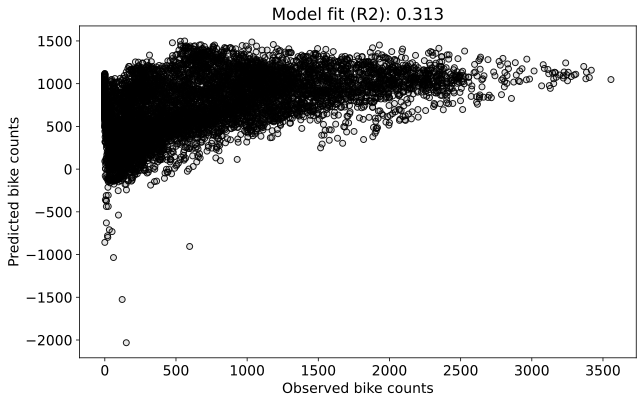

In [87]:
# Create a design matrix
desmat = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmat = np.append(desmat,np.ones((desmat.shape[0],1)),axis=1)


beta = np.linalg.lstsq(desmat,y,rcond=None)
yHat = desmat@beta[0]

# model fit to data (R^2)
modelfit = np.corrcoef(y.T,yHat.T)[0,1]**2

# and plot
plt.figure(figsize=(10,6))
plt.plot(y,yHat,'o',markerfacecolor=(0,0,0,.1),markeredgecolor=(0,0,0,.9))
plt.xlabel('Observed bike counts')
plt.ylabel('Predicted bike counts')
plt.title(f'Model fit (R2): {modelfit:.3f}')
plt.show()

- 계절을 기온으로 바꿨더니 꽤 개선된 모습..

### [연습문제 11-3]

In [88]:
# some random linear combination
lincombo = 4*desmat[:,0] + .4*desmat[:,1]

# Create a design matrix
desmatM = data[['Rainfall(mm)','Temperature(°C)']].to_numpy()
desmatM = np.append(desmatM,np.ones((desmatM.shape[0],1)),axis=1)

# augmented design matrix
desmatM = np.append(desmatM,lincombo.reshape(-1,1),axis=1)

# size and rank of the design matrix
print(f'Design matrix size: {desmatM.shape}')
print(f'Design matrix rank: {np.linalg.matrix_rank(desmatM)}')

# correlation matrix (note: nan's for intercept b/c no variance)
oSettings = np.seterr() # default error handling
np.seterr(all='ignore') # ignore warnings for correlation matrices
print(f'\nDesign matrix correlation matrix:')
print(np.round(np.corrcoef(desmatM.T),5))
np.seterr(**oSettings); # reset the error handling

Design matrix size: (8760, 4)
Design matrix rank: 3

Design matrix correlation matrix:
[[1.      0.05028     nan 0.7057 ]
 [0.05028 1.          nan 0.74309]
 [    nan     nan     nan     nan]
 [0.7057  0.74309     nan 1.     ]]


In [89]:
# A nicer way to print out the correlation matrix using pandas
pd.DataFrame(desmatM,columns=['Rain','Temp','Int','Combo']).corr()

,Rain,Temp,Int,Combo
Rain,1.000000,0.050282,NaN,0.705704
Temp,0.050282,1.000000,NaN,0.743094
Int,NaN,NaN,NaN,NaN
Combo,0.705704,0.743094,NaN,1.000000


In [90]:
### using left-inverse

# fit the model using the left-inverse
X_leftinv = np.linalg.inv(desmatM.T@desmatM) @ desmatM.T
# FYI, numpy knowingly "inverts" a singular matrix if it's within precision: https://github.com/numpy/numpy/issues/2074

# solve for the coefficients and compute R^2
beta1 = X_leftinv @ y
yHat  = desmatM@beta1

# model fit to data (R^2)
modelfit1 = np.corrcoef(y.T,yHat.T)[0,1]**2
print(modelfit1)

0.23123750701948895


In [91]:
### using numpy's least-squares

# fit the model
beta2 = np.linalg.lstsq(desmatM,y,rcond=None)
yHat  = desmatM@beta2[0]

# model fit to data (R^2)
modelfit2 = np.corrcoef(y.T,yHat.T)[0,1]**2
print(modelfit2)

0.3126481542486893


In [92]:
import statsmodels.api as sm

### using statsmodels

# convert the design matrix into a pandas dataframe
desmat_df = pd.DataFrame(desmatM)

# create and fit the model
desmat_df = sm.add_constant(desmat_df)
model = sm.OLS(obsdata_df,desmat_df).fit()


beta3 = model.params.values
modelfit3 = model.rsquared
print(modelfit3)

0.31264815424869075


/Users/junho/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/tsatools.py:161: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  x = pd.concat(x[::order], axis=1)


In [93]:
# print all to compare

print('MODEL FIT TO DATA:')
print(f'  Left-inverse: {modelfit1:.4f}')
print(f'  np lstsqr   : {modelfit2:.4f}')
print(f'  statsmodels : {modelfit3:.4f}')

print(' ')
print('BETA COEFFICIENTS:')
print(f'  Left-inverse: {np.round(beta1.T,3)}')
print(f'  np lstsqr   : {np.round(beta2[0].T,3)}')
print(f'  statsmodels : {np.round(beta3.T,3)}')

MODEL FIT TO DATA:
  Left-inverse: 0.2312
  np lstsqr   : 0.3126
  statsmodels : 0.3126
 
BETA COEFFICIENTS:
  Left-inverse: [[-459.138    2.264  337.483   53.004]]
  np lstsqr   : [[ -8.567  37.239 337.483 -19.374]]
  statsmodels : [ -8.567  37.239 337.483 -19.374]


- Left-inverse는 왜 다르게 나오지?

### [연습문제 11-4]

In [94]:
gamma = 0

res = np.linalg.inv(desmatM.T@desmatM + (gamma*np.linalg.norm(desmatM,'fro')**2)*np.eye(desmatM.shape[1]))

print(f"inv(X'X + {gamma}*I) 크기: {res.shape}")
print(f"inv(X'X + {gamma}*I) 계수: {np.linalg.matrix_rank(res)}")

inv(X'X + 0*I) 크기: (4, 4)
inv(X'X + 0*I) 계수: 2


In [95]:
gamma = 0.01

res2 = np.linalg.inv(desmatM.T@desmatM + (gamma*np.linalg.norm(desmatM,'fro')**2)*np.eye(desmatM.shape[1]))

print(f"inv(X'X + {gamma}*I) 크기: {res2.shape}")
print(f"inv(X'X + {gamma}*I) 계수: {np.linalg.matrix_rank(res2)}")

inv(X'X + 0.01*I) 크기: (4, 4)
inv(X'X + 0.01*I) 계수: 4


In [101]:
gammaspace = np.linspace(0,0.2,40)

original = np.zeros(len(gammaspace))
multiple = np.zeros(len(gammaspace))

for i in range(len(gammaspace)):
    gamma = gammaspace[i]

    res = np.linalg.inv(desmat.T@desmat + (gamma*np.linalg.norm(desmat,'fro')**2)*np.eye(desmat.shape[1])) @ desmat.T

    beta = res @ y
    yHat = desmat @ beta

    original[i] = np.corrcoef(y.T,yHat.T)[0,1]**2

    res2 = np.linalg.inv(desmatM.T@desmatM + (gamma*np.linalg.norm(desmatM,'fro')**2)*np.eye(desmatM.shape[1])) @ desmatM.T

    beta2 = res2 @ y
    yHat2 = desmatM @ beta2

    multiple[i] = np.corrcoef(y.T,yHat2.T)[0,1]**2


/var/folders/_4/mvxsg_zj2q35755ky_zps0780000gn/T/ipykernel_5610/1001254995.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


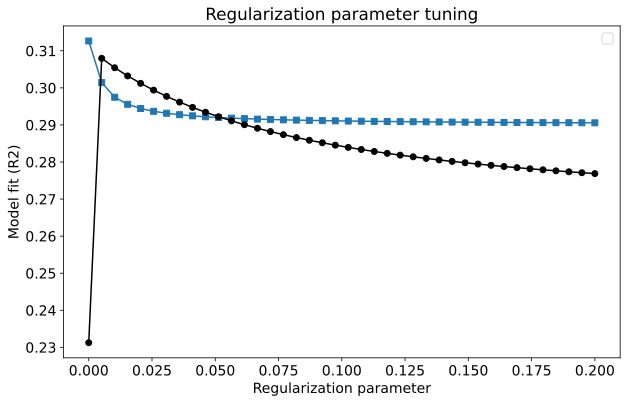

In [104]:
plt.figure(figsize=(10,6))
plt.plot(gammaspace,original,'s-')
plt.plot(gammaspace,multiple,'ko-')
plt.xlabel('Regularization parameter')
plt.ylabel('Model fit (R2)')
plt.title('Regularization parameter tuning')
plt.legend()
plt.show()

### [연습문제 11-5]

In [105]:
# the data
year       = [1534, 1737, 1803, 1928, 1960, 1975, 1987, 2023, 2057, 2100 ]
doubleTime = [ 697,  594,  260,  125,   76,   47,   37,   48,   70,  109 ]

/var/folders/_4/mvxsg_zj2q35755ky_zps0780000gn/T/ipykernel_5610/4257780363.py:5: RankWarning: Polyfit may be poorly conditioned
  beta = np.polyfit(year,doubleTime,i)


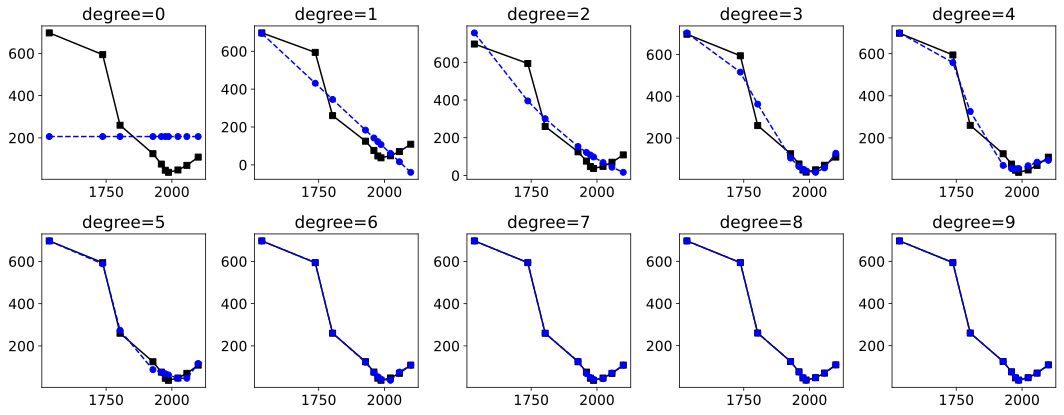

In [108]:
_, axs = plt.subplots(2,5,figsize=(15,6))
axs = axs.flatten()

for i in range(10):
    beta = np.polyfit(year,doubleTime,i)
    yHat = np.polyval(beta,year)

    axs[i].plot(year,doubleTime,'ks-')
    axs[i].plot(year,yHat,'bo--')
    axs[i].set_title(f'degree={i}')

plt.tight_layout()
plt.show()
